In [3]:
!pip install imblearn



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
data = pd.read_csv('agricultural sustainability.csv')
data.head()


,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0


In [7]:
# Define features and target
X = data[['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint', 'fertilizer_use']]
y = data['sustainability']

In [8]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


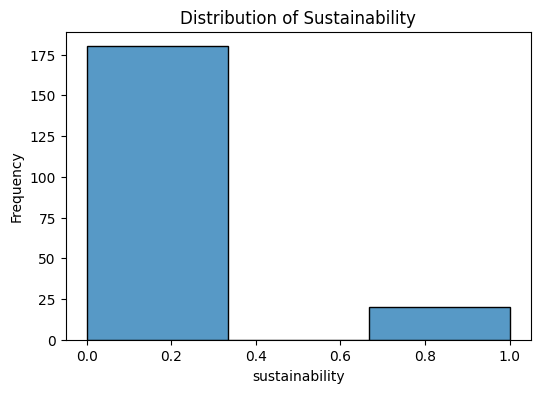

In [18]:
# Distribution of Sustainability (Target)
plt.figure(figsize=(6, 4))
sns.histplot(data['sustainability'], bins=3)
plt.title('Distribution of Sustainability')
plt.xlabel('sustainability')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Check class distribution before balancing
print("Class distribution before balancing:")
print(y_train.value_counts())

Class distribution before balancing:
sustainability
0    144
1     16
Name: count, dtype: int64


In [10]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [11]:
# Check class distribution after balancing
print("Class distribution after balancing:")
print(pd.Series(y_train_balanced).value_counts())

Class distribution after balancing:
sustainability
0    144
1    144
Name: count, dtype: int64


In [12]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [13]:
# Predict on the test set
y_pred = model.predict(X_test)

In [14]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


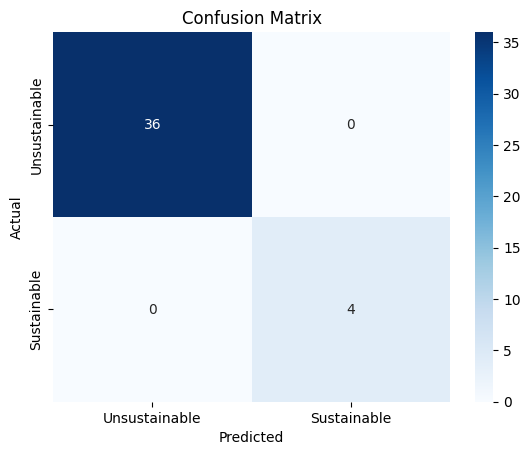

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Unsustainable', 'Sustainable'], 
            yticklabels=['Unsustainable', 'Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Unsustainable', 'Sustainable']))


               precision    recall  f1-score   support

Unsustainable       1.00      1.00      1.00        36
  Sustainable       1.00      1.00      1.00         4

     accuracy                           1.00        40
    macro avg       1.00      1.00      1.00        40
 weighted avg       1.00      1.00      1.00        40



In [17]:
# Save the model to a file
import joblib
joblib.dump(model, 'agricultural_sustainability_model_balanced.pkl')

['agricultural_sustainability_model_balanced.pkl']